## Synthetic data visualization
Script for visualizing the latent trajectories of the synthetic data generated for our experiments.

These script has to parts:

1. Generate and visualize the data generated, with different parameters

2. Train a small model with the data and see how it behaves



In [1]:
#Import
# working dir
%cd /homedtic/gmarti/CODE/RNN-VAE/

# Imports
import sys
sys.path.insert(0, '/homedtic/gmarti/CODE/RNN-VAE/')
from rnnvae import rnnvae_s
from rnnvae.plot import plot_losses, plot_trajectory, plot_total_loss, plot_z_2d, plot_z_time_2d, plot_latent_space
import os
import math
from rnnvae.data_gen import SinDataGenerator, LatentDataGenerator, LatentDataGeneratorCurves
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import torch

%matplotlib inline

/homedtic/gmarti/CODE/RNN-VAE


ImportError: cannot import name 'open_MRI_data_var'

## Part 1: visualize the data
Create a generator of the data and visualize it

In [ ]:
## PARAMETERS

X_samples_tensor = []
nsamples = 500
curves = [("sigmoid", {"L": 1, "k": 10, "x0": 5}),
          ("sigmoid", {"L": 1, "k": -5, "x0": 3}),
          ("sigmoid", {"L": 1, "k": -15, "x0": 1})]
ntp = 10
noise = 0.001

#generate the data
X_samples_list = []
for ch_curves in p['curves']:
    gen_model = SinDataGenerator(ch_curves, p["ntp"], p["noise"])
    samples = gen_model.generate_n_samples(nsamples)
    X_samples = np.asarray([y for (_,y) in samples])
    X_samples_list.append(X_samples)
    # X_samples_tensor.append(torch.FloatTensor(X_samples).permute((1,0,2)).to(DEVICE))

import pdb; pdb.set_trace()
    
    

In [ ]:
# Plot the data
nsubject = 
n_ch = 
n_feat = 

X_to_plot = X_samples_list[n_ch, nsubject, n_feat]

plt.figure()
plt.plot(range(len(X_to_plot)), X_to_plot, '-b')
plt.show()

## Part 2: run a model

Get the data and 

In [5]:
# DEVICE
## Decidint on device on device.
DEVICE_ID = 0
DEVICE = torch.device('cuda:' + str(DEVICE_ID) if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    torch.cuda.set_device(DEVICE_ID)

print(DEVICE)

out_dir = "/homedtic/gmarti/EXPERIMENTS_MCVAE/synth_testing/"

#load parameters
p = eval(open(out_dir + "params.txt").read())
print(p['curves'])

#ut parameters that initially were not there
ch_type = ['long','long','long']

model = rnnvae_s.MCRNNVAE(p["h_size"], p["enc_hidden"],
                        p["enc_n_layers"], p["z_dim"], p["dec_hidden"], p["dec_n_layers"],
                        p["clip"], p["n_epochs"], p["batch_size"], 
                        p["n_channels"], p["ch_type"], p["n_feats"], p["c_z"], DEVICE, print_every=100, 
                        phi_layers=p["phi_layers"], sigmoid_mean=p["sig_mean"],
                        dropout=p["dropout"], dropout_threshold=p["drop_th"])

model = model.to(DEVICE)
model.load(out_dir+'model.pt')

cuda:0
[[('sigmoid', {'L': 1, 'k': 10, 'x0': 5}), ('sigmoid', {'L': 1, 'k': 10, 'x0': 5}), ('sigmoid', {'L': 1, 'k': 10, 'x0': 5})], [('sigmoid', {'L': 1, 'k': -5, 'x0': 3}), ('sigmoid', {'L': 1, 'k': -5, 'x0': 3}), ('sigmoid', {'L': 1, 'k': -5, 'x0': 3})], [('sigmoid', {'L': 1, 'k': -15, 'x0': 1}), ('sigmoid', {'L': 1, 'k': -15, 'x0': 1}), ('sigmoid', {'L': 1, 'k': -15, 'x0': 1})]]


In [6]:
X_samples_tensor = []
nsamples = 500
#generate the data
for ch_curves in p['curves']:
    gen_model = SinDataGenerator(ch_curves, p["ntp"], p["noise"])
    samples = gen_model.generate_n_samples(nsamples)
    X_samples = np.asarray([y for (_,y) in samples])
    X_samples_tensor.append(torch.FloatTensor(X_samples).permute((1,0,2)).to(DEVICE))

# Predict the reconstructions from X_val and X_train
X_sample = model.predict(X_samples_tensor, p['ntp'])

#Get the samples
X_pred = [np.array(x).swapaxes(0,1) for x in X_sample['xnext']]
z_sample = [np.array(x).swapaxes(0,1) for x in X_sample['z']]

TypeError: predict() missing 1 required positional argument: 'nt'

In [40]:
# Test the new function of latent space
qzx = [np.array(x) for x in X_sample['qzx']]
print(len(qzx))
print(len(qzx[0]))
# Get classificator labels, for n time points
classif = [[i]*nsamples for i in range(p["ntp"])]
classif = [item for elem in classif for item in elem]

2
10


In [41]:
# Test reconstruction of samples
#Generate data, with different parameters
n_rec_tp = 10
X_samples_tensor = []
X_samples_notensor = []
nsamples = 500
#generate the data
for ch_curves in p['curves']:
    gen_model = SinDataGenerator(ch_curves, n_rec_tp, 0)
    samples = gen_model.generate_n_samples(nsamples)
    X_samples = np.asarray([y for (_,y) in samples])
    X_samples_tensor.append(torch.FloatTensor(X_samples).permute((1,0,2)).to(DEVICE))
    X_samples_notensor.append(X_samples)
# Predict the reconstructions from X_val and X_train


2
(500, 10, 3)
2
(500, 10, 3)


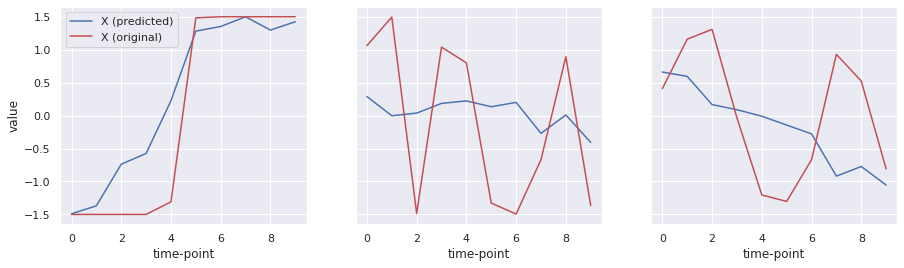

In [47]:

X_fwd = model.predict(X_samples_tensor, n_rec_tp)

#Reformulate things
X_pred = [np.array(x).swapaxes(0,1) for x in X_sample['xnext']]

print(len(X_pred))
print(X_pred[0].shape)

print(len(X_samples_notensor))
print(X_samples_notensor[0].shape)

subj = 3
sns.set()

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,4), sharex=False, sharey=True)
## Create figures of three signals and their points, with a subplots and everything
ch_feats = [(0,1),(0,0),(1,0)]
axes = [ax1,ax2,ax3]
for ((ch, feat), ax) in zip(ch_feats, axes):

    X_hat_line = X_pred[ch][subj, :, feat]   #Select only the subject we want
    X_samples_line = X_samples_notensor[ch][subj, :, feat]   #Select only the subject we want

    # Plot the two lines
    ax.plot(range(len(X_hat_line)), X_hat_line, '-b', label='X (predicted)')
    ax.plot(range(len(X_samples_line)), X_samples_line, '-r', label='X (original)')

    ax.set_xlabel('time-point')
    #ax.xlabel("time-point")
    #ax.ylabel("value")

ax1.set_ylabel('value')

ax1.legend(loc='upper left')
#plt.title("Predicted vs real")
plt.show()

2
(500, 10, 3)
2
(500, 10, 3)
(10,)
(10,)


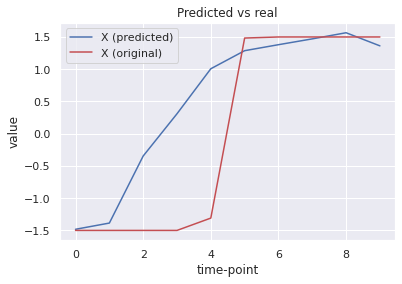

In [43]:
#Reconstruct one channel from the other
"""
n_rec_tp = 10
X_samples_tensor = []
X_samples_notensor = []
nsamples = 500
#generate the data
for ch_curves in p['curves']:
    gen_model = SinDataGenerator(ch_curves, n_rec_tp, 0)
    samples = gen_model.generate_n_samples(nsamples)
    X_samples = np.asarray([y[:5] for (_,y) in samples])
    X_samples_tensor.append(torch.FloatTensor(X_samples).permute((1,0,2)).to(DEVICE))
    X_samples_notensor.append(X_samples)
""" 
# Predict the reconstructions from X_val and X_train
X_fwd = model.predict(X_samples_tensor, n_rec_tp, av_ch=[1])

#Reformulate things
X_fwd = [np.array(x).swapaxes(0,1) for x in X_fwd['xnext']]

print(len(X_fwd))
print(X_fwd[0].shape)

print(len(X_samples_notensor))
print(X_samples_notensor[0].shape)


feat = 1
subj = 3
channel = 0

X_hat_line = X_fwd[channel][subj,:,feat]   #Select only the subject we want
X_samples_line = X_samples_notensor[channel][subj,:,feat]   #Select only the subject we want

print(X_hat_line.shape)
print(X_samples_line.shape)

# Plot the two lines
plt.plot(range(len(X_hat_line)), X_hat_line, '-b', label='X (predicted)')
plt.plot(range(len(X_samples_line)), X_samples_line, '-r', label='X (original)')

plt.xlabel("time-point")
plt.ylabel("value")

plt.legend(loc='upper left')
plt.title("Predicted vs real")
plt.show()